In [87]:
import json
import csv
import pandas as pd

In [5]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [6]:
def extract_scores_in_file(file_name='blue_scores.txt'):
    # initialize a list for storing BLUE SCORES
    scores = []
    # store 
    json_str = ''
    
    # open blue_scores.txt
    with open(file_name, 'r') as file:
        for line in file:
            # ignore NUL
            if line.strip() == '':
                continue

            json_str += line.strip()
            # try JSON parsing
            if line.strip().endswith('}'):
                try:
                    json_obj = json.loads(json_str)
                    scores.append(json_obj['score'])
                    # Reset the JSON string to the accumulation of the next object
                    json_str = ''
                except json.JSONDecodeError:
                    # If it is not a valid JSON, continue accumulating strings
                    continue
    return np.array(scores)

In [7]:
blue_scores = extract_scores_in_file()

In [8]:
def extra_hyper_params_and_loss_in_file(file_name='output_hyper_params_and_loss.txt'):
    pattern_start_with_number = re.compile(r'^(\d+),(\d+\.\d+)')
    pattern_for_loss = re.compile(r'INFO: Epoch \d+: loss (\d+\.\d+)')
    pattern_for_valid_loss = re.compile(r'INFO: Epoch \d+: valid_loss (\d+\.\d+)')
    
    hyper_params = []
    loss = []
    valid_loss = []
    
    with open('output_hyper_params_and_loss.txt', 'r') as file:
        for line in file:
            # line starting with "INFO: Epoch"
            if line.startswith('INFO: Epoch'):
                match = pattern_for_loss.search(line)
                if match:
                    loss.append(float(match.group(1)))
                else:
                    match = pattern_for_valid_loss.search(line)
                    valid_loss.append(float(match.group(1)))
            else:
                # line starting with number
                match = pattern_start_with_number.match(line)
                if match:
                    hyper_params.append((int(match.group(1)), float(match.group(2))))
                    
    return hyper_params, loss, valid_loss


In [9]:
hyper_params, loss, valid_loss = extra_hyper_params_and_loss_in_file()

In [85]:
params = np.array(hyper_params).T
ls_batch_size = params[0]
ls_lr = params[1]

In [88]:
assert(len(ls_batch_size) == len(ls_lr) == len(loss) == len(valid_loss) == len(blue_scores))

data = {
    'batch_size': ls_batch_size,
    'learning_rate': ls_lr,
    'loss': loss,
    'valid_loss': valid_loss,
    'blue_score': blue_scores
}

df = pd.DataFrame(data)

print(df)


    batch_size  learning_rate   loss  valid_loss  blue_score
0          8.0         0.0100  3.192        4.02         0.2
1          8.0         0.0010  1.334        2.42        17.1
2          8.0         0.0006  1.327        2.33        16.9
3          8.0         0.0004  1.511        2.43        16.3
4          8.0         0.0002  1.601        2.42        15.0
5          8.0         0.0001  1.815        2.47        13.8
6         32.0         0.0100  2.020        3.03         5.4
7         32.0         0.0010  1.643        2.53        13.5
8         32.0         0.0006  1.559        2.46        14.7
9         32.0         0.0004  1.737        2.48        14.1
10        32.0         0.0002  2.311        2.78         7.9
11        32.0         0.0001  2.225        2.66         9.5
12        64.0         0.0100  2.515        3.67         0.7
13        64.0         0.0010  1.767        2.58        12.2
14        64.0         0.0006  1.669        2.44        13.5
15        64.0         0

/var/folders/gr/1wmjfjmx47zdkc_j4xz4rnpc0000gn/T/ipykernel_78055/2652751032.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=-30)


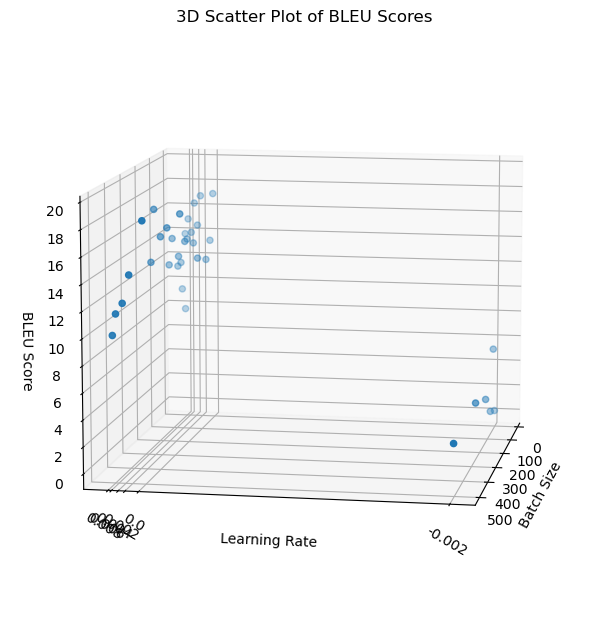

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


batch_sizes = np.array([8, 32, 64, 128, 256, 512])
learning_rates = np.array([0.01, 0.001, 0.0006, 0.0004, 0.0002, 0.0001])



fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')


img = ax.scatter(batch_size, lr, blue_scores, cmap=plt.get_cmap('inferno'))

ax.set_title('3D Scatter Plot of BLEU Scores')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('BLEU Score')

log_batch_sizes = np.log2(batch_sizes)

yticks = ax.get_yticks()
ax.set_yticklabels(yticks, rotation=-30)

ax.set_yticks(learning_rates)
ax.set_zticks(np.arange(0,21,2))

azimuth_angle = 10
elevation_angle = 10 
ax.view_init(elev=elevation_angle,
             azim=azimuth_angle)

plt.show()




/var/folders/gr/1wmjfjmx47zdkc_j4xz4rnpc0000gn/T/ipykernel_78055/2554941750.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=-90)


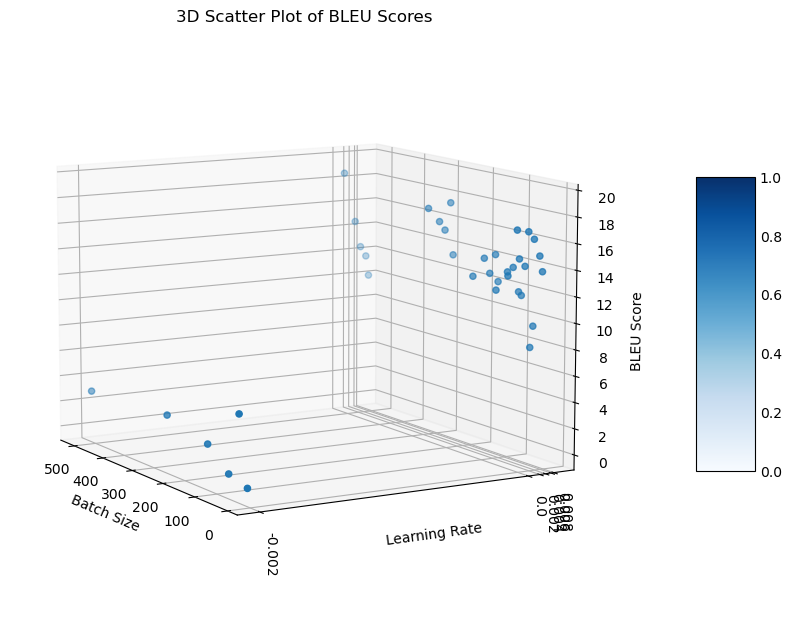

In [83]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')


img = ax.scatter(batch_size, lr, blue_scores, cmap=plt.get_cmap('inferno'))
# fig.colorbar(img, ax=ax, shrink=0.5, aspect=5)


ax.set_title('3D Scatter Plot of BLEU Scores')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('BLEU Score')

log_batch_sizes = np.log2(batch_sizes)

yticks = ax.get_yticks()
ax.set_yticklabels(yticks, rotation=-90)


ax.set_yticks(learning_rates)
ax.set_zticks(np.arange(0,21,2))
azimuth_angle = 150
elevation_angle = 10 
ax.view_init(elev=elevation_angle,
             azim=azimuth_angle)

plt.show()